In [72]:
import numpy as np

In [73]:
gps_meas_x = np.array([-393.66,-375.93,-351.04,-328.96,-299.35,-273.36,-245.89,-222.58,-198.03,-174.17,-146.32,-123.72,-103.47,-78.23,-52.63,-23.34,25.96,49.72,76.94,95.38,119.83,144.01,161.84,180.56,201.42,222.62,239.4,252.51,266.26,271.75,277.4,294.12,301.23,291.8,299.89])
gps_meas_y = np.array([300.4,301.78,295.1,305.19,301.06,302.05,300,303.57,296.33,297.65,297.41,299.61,299.6,302.39,295.04,300.09,294.72,298.61,294.64,284.88,272.82,264.93,251.46,241.27,222.98,203.73,184.1,166.12,138.71,119.71,100.41,79.76,50.62,32.99,2.14])

In [74]:
print(len(gps_meas_x))
print(len(gps_meas_y))

35
35


In [75]:
shape = 6

# pos_x, vel_x,acc_x, pos_y, vel_y, acc_y (state matrix)
x_est = np.array([[0,0,0,0,0,0]]).T

# observation matrix for xn,yn estimated (C as in Michel)
H = np.array([
    [1,0,0,0,0,0],
    [0,0,0,1,0,0]
])


uncertainity = 500

P_est = np.identity(shape) * uncertainity

deltaT = 1 #time interval

#state transition matrix
F =  np.array([
    [1,  deltaT ,0.5*deltaT*deltaT ,0,0     ,0],
    [0,  1      ,deltaT            ,0,0     ,0],
    [0,  0      ,1                 ,0,0     ,0],
    [0,  0      ,0                 ,1,deltaT,0.5*deltaT*deltaT],
    [0,  0      ,0                 ,0,1     ,deltaT],
    [0,  0      ,0                 ,0,0     ,1],
    ]) 
    
sd_acc = 0.2 # m/s2

# Process noise
Q = np.array([
    [deltaT**4/4,   deltaT**3/2,    deltaT**2/2,    0,  0,  0],
    [deltaT**3/2,   deltaT**2,      deltaT,         0,  0,  0],
    [deltaT**2/2,   deltaT,         1,              0,  0,  0],
    [0,             0,              0,              deltaT**4/4,  deltaT**3/2,  deltaT**2/2],
    [0,             0,              0,              deltaT**3/2,   deltaT**2,      deltaT],
    [0,             0,              0,              deltaT**2/2,   deltaT,         1]
]) * sd_acc*sd_acc

sd_gps_meas_x = 3 # meters
sd_gps_meas_y = 3 # meters

# measurement uncertainity
R = np.array([
    [sd_gps_meas_x**2,0],
    [0,sd_gps_meas_y**2]
])


In [76]:
# initialization prediction or intial state
x_pred =F.dot(x_est)
P_pred = F.dot(P_est).dot(F.T) + Q

In [77]:
x_est_all = []
x_pred_all = []

In [ ]:
for i in range(35):

    # measurement
    z = np.array([
        [gps_meas_x[i]],
        [gps_meas_y[i]]
    ])

    # update
    kalman_gain = np.around(P_pred.dot(H.T).dot(np.linalg.inv(H.dot(P_pred).dot(H.T)+R)),4)
    x_est = x_pred+kalman_gain.dot(z-H.dot(x_pred))
    P_est = (np.identity(shape)-kalman_gain.dot(H)).dot(P_pred).dot((np.identity(shape) - kalman_gain.dot(H)).T) + kalman_gain.dot(R).dot(kalman_gain.T)
    
    # prediction
    x_pred = F.dot(x_est) # no control matrix, process noise is 0
    P_pred = F.dot(P_est).dot(F.T) + Q

    x_est_all.append(x_est)
    x_pred_all.append(x_pred)



In [79]:
import matplotlib.pyplot as plt

In [80]:
x_estimates = []
y_estimates = []
for i in x_est_all:
    x_estimates.append(i[0])
    y_estimates.append(i[3])

x_predicts = []
y_predicts = []
for i in x_pred_all:
    x_predicts.append(i[0])
    y_predicts.append(i[3])

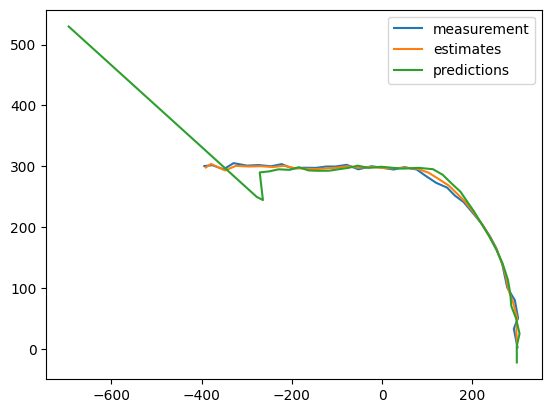

In [86]:
plt.plot(gps_meas_x,gps_meas_y,label='measurement')
plt.plot(x_estimates,y_estimates,label='estimates')
plt.plot(x_predicts,y_predicts,label='predictions')
plt.legend()
plt.show()